# Euchre

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.insert(0, 'C:/Users/jerem/Desktop/nonsense/euchre/')

from utils import EuchreGame

### Create Game object, check attributes

In [2]:
euchre_game = EuchreGame()

In [3]:
# create show_all_game_attributes method?
euchre_game.score

{'t1': 0, 't2': 0}

In [4]:
euchre_game.dealer

'p1'

In [5]:
euchre_game.next_to_deal

['p2', 'p3', 'p4', 'p1']

### Strategies
#### Call Trump Strategy
* always
* None  
#### Play Card Strategy
* random
* None

In [6]:
euchre_game.tm_call_trump_strategy

{'t1': None, 't2': None}

In [7]:
euchre_game.tm_play_card_strategy

{'t1': None, 't2': None}

### Deal cards

In [8]:
deck_of_cards = euchre_game.shuffle_deck_of_cards()
for card in deck_of_cards:
    print(card, end=',')

9_S,9_C,9_H,9_D,T_S,T_C,T_H,T_D,J_S,J_C,J_H,J_D,Q_S,Q_C,Q_H,Q_D,K_S,K_C,K_H,K_D,A_S,A_C,A_H,A_D,

In [9]:
player_hands, card_flipped_up = euchre_game.deal_hand()

In [10]:
player_hands

{'p1': ['Q_S', 'Q_H', 'K_H', 'K_S', 'Q_D'],
 'p2': ['9_S', 'T_C', 'J_C', 'K_C', 'T_S'],
 'p3': ['J_H', '9_H', 'A_S', 'Q_C', 'J_S'],
 'p4': ['J_D', '9_D', 'T_H', 'T_D', '9_C']}

In [11]:
card_flipped_up

'K_D'

### Choose suit for trump

In [12]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                                 player='p1', 
                                 card_flipped_up='A_S'):
    print('order up trump')

In [13]:
if euchre_game.eval_flipped_card(hand=['K_S', 'A_H', 'A_S', 'J_C', 'J_S'], 
                                 player='p2', 
                                 card_flipped_up='A_S'):
    print('order up trump')

order up trump


In [14]:
euchre_game.choose_open_trump(hand=['K_S', 'A_S', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='A_D')

'S'

In [15]:
euchre_game.choose_open_trump(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                              player='p2', 
                              card_flipped_up='T_S')

In [16]:
calling_player, trump = euchre_game.determine_trump(card_flipped_up=card_flipped_up,
                           player_hands=player_hands)

In [17]:
print(player_hands)
print(calling_player)
print(trump)

{'p1': ['Q_S', 'Q_H', 'K_H', 'K_S', 'Q_D'], 'p2': ['9_S', 'T_C', 'J_C', 'K_C', 'T_S'], 'p3': ['J_H', '9_H', 'A_S', 'Q_C', 'J_S'], 'p4': ['J_D', '9_D', 'T_H', 'T_D', '9_C']}
p4
D


### Play trick

In [18]:
cards_in_play, player_led = euchre_game.play_trick(player_hands=player_hands, 
                                                   trump='H', 
                                                   next_to_play_list=euchre_game.next_to_deal, 
                                                   cards_played_this_hand = [], 
                                                   unplayed_trump_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'],
                                                   verbose=True)

Leading with highest non-trump- Player p2 plays K_C, Current winning player p2
Following suit with lowest non-trump card- Player p3 plays Q_C, Current winning player p2
Teammate winning, following suit w/ lowest card- Player p4 plays 9_C, Current winning player p2
Lowest trump card- Player p1 plays Q_H, 

In [19]:
cards_in_play

{'p2': 'K_C', 'p3': 'Q_C', 'p4': '9_C', 'p1': 'Q_H'}

In [20]:
player_led

'p2'

#### Determine trick winner

In [21]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_H', 'p1': 'A_S'}, 
                           trump='S', 
                           player_led=player_led, 
                                   verbose=True)

p3 wins trick


'p3'

In [22]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_S', 'p1': 'A_S'}, 
                           trump='D', 
                           player_led=player_led, 
                                   verbose=False)

'p1'

In [23]:
trick_winner = euchre_game.determine_trick_winner(cards_in_play=cards_in_play,
                                           trump='H',
                                           player_led=player_led)

trick_winner

'p1'

In [24]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_H', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [25]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p1'

In [26]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [27]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p2'

#### Swap card in dealer hand

In [190]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_C', 'A_D', 'K_H', 'K_S', 'J_D'], 
                 verbose=True)

Dealer discards K_H and picks up A_S


['J_C', 'A_D', 'K_S', 'J_D', 'A_S']

In [191]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['J_H', 'A_D', 'K_H', 'K_S', 'T_D'], 
                 verbose=True)

Dealer discards T_D and picks up A_S


['J_H', 'A_D', 'K_H', 'K_S', 'A_S']

In [192]:
euchre_game.swap_dealer_card(card_flipped_up='A_S', 
                 dealer_hand=['9_H', 'T_H', 'K_H', 'Q_H', 'A_D'], 
                 verbose=True)

Dealer discards A_D and picks up A_S


['9_H', 'T_H', 'K_H', 'Q_H', 'A_S']

In [193]:
euchre_game.swap_dealer_card(card_flipped_up='J_S', 
                 dealer_hand=['9_S', 'A_S', 'Q_S', 'K_S', 'T_S'], 
                 verbose=True)

Dealer discards 9_S and picks up J_S


['A_S', 'Q_S', 'K_S', 'T_S', 'J_S']

## Play card

In [46]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='S',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D', verbose=True)

Current winning player p3
Following suit with lowest non-trump card- 

'J_D'

In [45]:
euchre_game.play_card(player='p4',
                      hand=['J_H', 'A_C', '9_H', 'K_S', 'J_D'], 
                      trump='D',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D', 
                      verbose=True)

Current winning player p2
Teammate winning, following suit w/ lowest trump card- 

'J_H'

### Play lead card

In [47]:
euchre_game.play_lead_card(hand=['9_D', 'T_C', '9_C', 'A_S', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_S'

In [48]:
euchre_game.play_lead_card(hand=['T_D', 'T_C', 'Q_C', 'A_D', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'A_D'

### Play random card

In [49]:
from utils import play_random_card

In [50]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led=None)

'9_D'

In [51]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='D')

'9_D'

#### Get lowest card

In [56]:
from utils import get_lowest_card

In [57]:
get_lowest_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'])

'9_D'

In [58]:
get_lowest_card(hand=['T_D', 'T_C', 'T_H', 'J_S', 'A_C'])

'T_D'

#### Get lowest trump card

In [59]:
from utils import get_lowest_trump_card

In [60]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='H')

'J_D'

In [61]:
get_lowest_trump_card(hand=['J_H', 'J_D'], trump='C')

In [62]:
get_lowest_trump_card(hand=['J_H', 'J_S', 'A_C'], trump='C')

'A_C'

#### Get lowest nontrump card in suit

In [ ]:
from utils import get_lowest_nontrump_card_in_suit

In [63]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H'], suit='H')

'Q_H'

In [64]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H'], suit='S')

In [65]:
get_lowest_nontrump_card_in_suit(hand=['K_H', 'Q_H', 'J_H'], suit='H')

'J_H'

#### Get highest nontrump card

In [66]:
from utils import get_highest_nontrump_card

In [67]:
get_highest_nontrump_card(hand=['A_H'], trump='H')

In [68]:
get_highest_nontrump_card(hand=['A_H', 'A_D', 'A_S'], trump='H')

'A_D'

In [69]:
get_highest_nontrump_card(hand=['T_H', '9_D', 'A_S'], trump='S')

'T_H'

In [299]:
from utils import get_lowest_nontrump_card_in_suit

In [323]:
# when will this get executed?
    # 1 - teammate winning, trump led, have no trump
    # 2 - teammate winning, trump not led, no cards in led suit  (trump here?)
    # 3 - teammate not winning, trump led, no trump
    # 4 - teammate not winning, trump not led, no cards in led suit, no trump

    # pass in no_trump_in_hand to situations where it has already been checked
    
def get_lowest_nontrump_card_in_hand(hand: list, 
                                     trump: str, 
                                     cards_played_this_hand: list, 
                                     no_trump_in_hand=False,
                                     verbose=False):
    """
    Function to return the lowest nontrump card overall in hand
    Return None if only trump cards remain in hand - must pass in no_trump_in_hand
    Returns card
    """
    card_values = {
        'A': 5,
        'K': 4,
        'Q': 3,
        'J': 2,
        'T': 1,
        '9': 0,
    }
    
    if no_trump_in_hand:  # play card that can take fewest other cards
        print('No trump in hand')
        idx_to_return = 0
        fewest_lower_cards = 6
        for idx, card in enumerate(hand):
            lower_cards = card_values[card[0]]
            if lower_cards == 0:  # return nontrump 9 immediately
                return card
            for played_card in cards_played_this_hand:
                if played_card[-1] == trump or (return_off_suit(played_card[-1]) == trump and played_card[0] == 'J'):
                    continue
                if card[-1] == played_card[-1] and card_values[card[0]] > card_values[played_card[0]]:
                    lower_cards -= 1
            if lower_cards == 0:  # return nontrump card with no lower cards immediately
                return card
            if lower_cards < fewest_lower_cards:
                fewest_lower_cards = lower_cards
                idx_to_return = idx
            print(f'{card} has {lower_cards} lower cards')
        return hand[idx_to_return]
    
    else:
        print('trump in hand')
        # count trumps in hand
        num_trumps = 0
        for card in hand:
            if card[-1] == trump or (return_off_suit(card[-1]) == trump and card[0] == 'J'):
                num_trumps += 1

        print(f'Num trumps: {num_trumps}')
        if num_trumps == len(hand):  # only trump left
            print('Only trump left, returning None')
            return None

        if num_trumps > 0 and len(hand) > 2:  # if trump in hand, short suit
            # get suit counts
            suit_counts = {}
            for card in hand:
                if card[-1] == trump or (return_off_suit(card[-1]) == trump and card[0] == 'J'):  # don't count trump
                    continue
                if card[-1] in suit_counts.keys():
                    suit_counts[card[-1]] += 1
                else:
                    suit_counts[card[-1]] = 1
            # list of suit(s) with fewest count
            minval = min(suit_counts.values())
            short_suits = [k for k, v in suit_counts.items() if v == minval]
            
            # if there are multiple suits that could be shorted
            if len(short_suits) > 1:
                card_to_play_points = 9
                # find short suit with lowest card  # TODO: update this to card with fewest cards it can take
                for idx, card in enumerate(hand):
                    if card[-1] in short_suits and not (
                            return_off_suit(card[-1]) == trump and card[0] == 'J'):
                        card_points = card_values[card[0]]
                        if card_points < card_to_play_points:
                            card_to_play_points = card_points
                            idx_to_return = idx
                suit_to_play = hand[idx_to_return][-1]
            else:
                suit_to_play = short_suits[0]
            
            return get_lowest_nontrump_card_in_suit(hand=hand, suit=suit_to_play)
            
        else:  # play card that can take fewest other cards
            idx_to_return = 0
            fewest_lower_cards = 6
            for idx, card in enumerate(hand):
                if card[-1] == trump or (return_off_suit(card[-1]) == trump and card[0] == 'J'):  # don't play trump
                    continue
                lower_cards = card_values[card[0]]
                if lower_cards == 0:  # return nontrump 9 immediately
                    return card
                for played_card in cards_played_this_hand:
                    if played_card[-1] == trump or (return_off_suit(played_card[-1]) == trump and played_card[0] == 'J'):
                        continue
                    if card[-1] == played_card[-1] and card_values[card[0]] > card_values[played_card[0]]:
                        lower_cards -= 1
                if lower_cards == 0:  # return nontrump card with no lower cards immediately
                    return card
                if lower_cards < fewest_lower_cards:
                    fewest_lower_cards = lower_cards
                    idx_to_return = idx
            return hand[idx_to_return]

In [324]:
# should play T_C to short suits (partner plays A_H and leads trick, lay off)
get_lowest_nontrump_card_in_hand(hand=['9_D', 'J_H', 'T_C', 'K_S', 'T_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_C'], 
                                 no_trump_in_hand=False,
                            verbose=True)

trump in hand
Num trumps: 2


'T_C'

In [325]:
# should play T_C (since 9_C already played so T_S is better card)
get_lowest_nontrump_card_in_hand(hand=['9_D', 'T_C', 'Q_C', 'K_S', 'T_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_C'], 
                                 no_trump_in_hand=False,
                            verbose=True)

trump in hand
Num trumps: 1


'T_C'

In [326]:
# should return J_S
get_lowest_nontrump_card_in_hand(hand=['T_C', 'J_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=True,
                            verbose=True)

No trump in hand
T_C has 1 lower cards


'J_S'

In [327]:
# should return A_S
get_lowest_nontrump_card_in_hand(hand=['A_C', 'A_S'], 
                            trump='D', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=True,
                            verbose=True)

No trump in hand
A_C has 5 lower cards
A_S has 3 lower cards


'A_S'

In [328]:
# should return J_S
get_lowest_nontrump_card_in_hand(hand=['T_C', 'J_C'], 
                            trump='C', 
                            cards_played_this_hand=['J_D', '9_S', 'T_S'], 
                                 no_trump_in_hand=False,
                            verbose=True)

trump in hand
Num trumps: 2
Only trump left, returning None


### Play full game

In [350]:
%%time

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=True)

Hand #0- Dealer: p1; Player Hands: {'p1': ['T_H', 'Q_S', 'J_C', '9_S', 'J_S'], 'p2': ['T_S', 'K_S', 'J_H', 'Q_D', 'Q_C'], 'p3': ['T_C', '9_C', 'K_D', 'K_H', 'J_D'], 'p4': ['9_D', 'Q_H', 'A_S', '9_H', 'K_C']}
Card flipped up: T_D
Player p1 in seat 4 has chosen S as trump
Trick 0: Leading with highest non-trump- Player p2 plays Q_D, Current winning player p2
Following suit with lowest non-trump card- Player p3 plays J_D, Current winning player p2
Teammate winning, following suit w/ lowest card- Player p4 plays 9_D, Current winning player p2
Lowest trump card- Player p1 plays 9_S, p1 wins trick
Cards played this hand list ['Q_D', 'J_D', '9_D', '9_S']
Trick 1: Leading with highest trump card remaining- Player p1 plays J_S, Current winning player p1
Following suit with lowest trump card- Player p2 plays T_S, Current winning player p1
Teammate winning, no trump, play lowest card- Player p3 plays 9_C, Current winning player p1
Following suit with lowest trump card- Player p4 plays A_S, p1 win

In [278]:
euchre_game.score

{'t1': 10, 't2': 6}

#### Profile performance

In [359]:
%%prun

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=False)

### Loop through games played, collect strategy results

In [257]:
from scipy.stats import ttest_ind

In [360]:
%%time

N_GAMES_TO_PLAY = 1000

strategy_results = {'t1_wins':0, 't1_scores':[], 't2_scores':[]}

for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    # euchre_game.tm_call_trump_strategy['t1'] = 'NEW'  # set team 2 call trump strategy to NEW
    # euchre_game.tm_call_trump_strategy['t2'] = 'always'  # set team 2 call trump strategy to always
    euchre_game.tm_play_card_strategy['t2'] = 'random'  # set team 2 play card strategy to random
    euchre_game.play_full_game(verbose=False)
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        strategy_results['t1_wins'] += 1
    strategy_results['t1_scores'].append(euchre_game.score['t1'])
    strategy_results['t2_scores'].append(euchre_game.score['t2'])

Wall time: 6.7 s


In [361]:
print(f"""Team 1 strategy won {strategy_results['t1_wins']}/{N_GAMES_TO_PLAY} games \
({strategy_results['t1_wins']/N_GAMES_TO_PLAY*100}%)""")

Team 1 strategy won 720/1000 games (72.0%)


#### T-test for statistically significant difference in means between t1 and t2 scores

In [362]:
ttest_ind(strategy_results['t1_scores'], strategy_results['t2_scores'])

Ttest_indResult(statistic=21.857987022552432, pvalue=3.854362044305969e-95)

### Plot results

In [261]:
import matplotlib.pyplot as plt

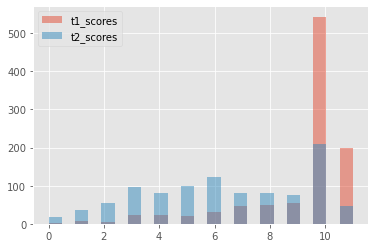

In [262]:
plt.style.use('ggplot')
plt.hist(strategy_results['t1_scores'], bins=23, alpha=0.5, label='t1_scores')
plt.hist(strategy_results['t2_scores'], bins=23, alpha=0.5, label='t2_scores')
plt.legend(loc='upper left')

## Loop through games played, collect hand_results

In [263]:
import pandas as pd

In [264]:
from utils import return_off_suit, get_teammate

In [265]:
euchre_game = EuchreGame()
hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
hand_results[0]

{'player_hands': {'p1': ['T_S', 'K_D', 'J_C', 'Q_S', 'K_C'],
  'p2': ['K_S', 'J_S', '9_C', 'T_C', 'J_D'],
  'p3': ['Q_D', 'J_H', '9_D', 'T_D', 'Q_H'],
  'p4': ['Q_C', 'A_S', '9_H', 'T_H', 'K_H']},
 'calling_player': 'p3',
 'trump': 'D',
 'dealer': 'p1',
 'hand_score': {'t1': 1, 't2': 0},
 'trick_winners': {'p2': 1, 'p3': 3, 'p4': 1, 'p1': 0}}

In [266]:
# TODO: add number of suits

def return_df_from_hand_results(hand_results_dict):
    fields_to_collect = ['tricks_won',
                         'is_calling_player',
                         'teammate_called',
                         'has_right', 
                         'has_left',
                         'has_Atrump',
                         'has_Ktrump',
                         'has_Qtrump',
                         'has_Ttrump',
                         'has_9trump',
                         'num_off_A',
                         'num_off_K',
                         'num_off_Q']
    results_list = []
    for player in hand_results_dict['trick_winners'].keys():
        player_hand_results = dict.fromkeys(fields_to_collect,0)
        player_hand_results['tricks_won'] = hand_results_dict['trick_winners'][player]
        player_hand_results['partner_tricks'] = hand_results_dict['trick_winners'][get_teammate(player)]
        if player == hand_results_dict['calling_player']:
            player_hand_results['is_calling_player'] = 1
        if get_teammate(player) == hand_results_dict['calling_player']:
            player_hand_results['teammate_called'] = 1
        for idx, card in enumerate(hand_results_dict['player_hands'][player]):
            if card[-1] == hand_results_dict['trump']:
                if card[0] == 'A':
                    player_hand_results['has_Atrump'] = 1
                if card[0] == 'K':
                    player_hand_results['has_Ktrump'] = 1
                if card[0] == 'Q':
                    player_hand_results['has_Qtrump'] = 1
                if card[0] == 'J':
                    player_hand_results['has_right'] = 1
                if card[0] == 'T':
                    player_hand_results['has_Ttrump'] = 1
                if card[0] == '9':
                    player_hand_results['has_9trump'] = 1
            else:
                if card[0] == 'A':
                    player_hand_results['num_off_A'] += 1
                if card[0] == 'K':
                    player_hand_results['num_off_K'] += 1
                if card[0] == 'Q':
                    player_hand_results['num_off_Q'] += 1
                if card[0] == 'J':
                    if return_off_suit(card[-1]) == hand_results_dict['trump']:
                        player_hand_results['has_left'] = 1
        results_list.append(player_hand_results)
    return pd.DataFrame(results_list)

In [267]:
%%time

N_GAMES_TO_PLAY = 100

all_hand_results_df = pd.DataFrame()
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    game_results_df = pd.DataFrame()
    for hand in hand_results:
        hand_results_df = return_df_from_hand_results(hand)
        game_results_df = pd.concat([game_results_df, hand_results_df])
    all_hand_results_df = pd.concat([all_hand_results_df, game_results_df])

Wall time: 28.5 s


In [268]:
all_hand_results_df.shape

(47600, 14)

In [269]:
all_hand_results_df.sort_values('tricks_won', ascending=False).head(10)

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,partner_tricks
0,5,1,0,1,1,0,0,0,1,1,0,1,0,0
2,5,1,0,1,0,0,0,1,0,1,1,1,0,0
0,5,1,0,1,1,0,0,1,1,0,0,1,0,0
3,5,1,0,0,1,1,0,0,0,1,0,1,1,0
0,5,1,0,1,1,1,0,0,1,0,0,1,0,0
0,5,1,0,1,1,0,0,1,1,0,0,1,0,0
3,5,1,0,0,0,0,1,1,0,1,0,1,0,0
0,5,1,0,1,0,0,1,0,1,1,1,0,0,0
3,5,1,0,1,1,0,1,0,0,1,0,0,0,0
1,5,1,0,1,1,0,0,0,1,1,0,1,0,0


In [270]:
# check hand with right bauer didn't take 0 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']==0) & (all_hand_results_df['has_right']==1)].shape[0] == 0

In [271]:
# check hands with right and left didn't ever take less than 2 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<2) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1)].shape[0] == 0

In [272]:
# check hands with right and left and Atrump didn't ever take less than 3 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']<3) & 
                           (all_hand_results_df['has_right']==1) & 
                           (all_hand_results_df['has_left']==1) & 
                           (all_hand_results_df['has_Atrump']==1)].shape[0] == 0

In [273]:
all_hand_results_df.groupby(['has_right', 
                             'has_left', 
                            'has_Atrump', 
                            #'has_Ktrump', 
                            # 'has_Qtrump'
                            ]).agg(avg_tricks=('tricks_won', 'mean'), num_hands=('has_right','count'))

avg_tricks  num_hands
has_right has_left has_Atrump                       
0         0        0             0.643334      24429
                   1             1.350846       2836
          1        0             1.153983       9014
                   1             2.218798        649
1         0        0             2.438721       7727
                   1             2.973333       1125
          1        0             3.175270       1666
                   1             4.103896        154

#### Write out all hand results to csv local

In [238]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\euchre'

In [239]:
all_hand_results_df.to_csv('all_hand_results.csv', index=False)

### Next steps for development

In [ ]:
# Build out play card strategy
    # add logic to check what cards have been played in hand so far
        # update cards_played_this_hand to dict to be able to tell which players played which cards?
        # player_short_suits_dict - keep track of what players don't have what suits based on following suit
    # replace find_highest_remaining_trump with list of unplayed trump cards each hand

# Handle loners
    # add functionality to determine trump to check loner strategy, return loner_called boolean to play_hand
        # start with strategy to call loner when right/left and 4 total trump
    # update play_trick to pass in loner_called, remove partner of calling_player from next_to_play_list

# Build out strategy for play_lead_card function to reduce number of suits in hand, play toward partner short-suits

# Build out framework to evaluate statistical significance of different strategies
    # chart overlapping histograms of points scored for different strategies across hands
# Evaluate points scored for each hand type for each game
# Code cleanup
    # Add tests, comments to all functions
    # README, docs

# Look at combinations of exactly unique hands, vs. unique types of hands

# Add consideration of calling up trump to include if partner is dealer, if player is dealer
# Add consideration of calling up trump to how high the card_flipped_up is - more likely if 9,T, less if J

# Can you "count on your partner for 1"? What is the average number of tricks taken by the partner of the calling player?
# When (if ever) is it a good idea to overtake a trick your partner is currently winning?
# When is it appropriate to not play the highest or lowest card within a suit but the mid?
    # 9, K, right of trump - use K to take trick, lead right, then play 9
    # is this ever best in nontrump?
    